# Load Data & Import Library

In [1]:
#Install Category Encoding
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Manipulation
import numpy as np
import pandas as pd
import scipy
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#Warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

#Preparation install
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from sklearn import set_config

#Documentation
#import torch

In [3]:
!pip install matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 20.0 MB/s 
     |████████████████████████████████| 965 kB 55.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [6]:
matplotlib.__version__

'3.5.1'

In [50]:
df = pd.read_csv('train.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


# Feature Extraction

Feature extraction yang bisa dilakukan di dataset: 
</br> 1. mengubah kolom Vintage dari yang tadinya bersatuan hari menjadi bulan.
</br> 2. melakukan binning pada kolom Age dan Annual_Premium.

## Vintage

In [51]:
df['Vintage_mon'] = round(df['Vintage']/30)
df[['Vintage', 'Vintage_mon']]

,Vintage,Vintage_mon
0,217,7.0
1,183,6.0
2,27,1.0
3,203,7.0
4,39,1.0
...,...,...
381104,88,3.0
381105,131,4.0
381106,161,5.0
381107,74,2.0


In [52]:
# df = df.drop(columns=['Vintage'])
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,7.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,6.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,7.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3.0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,4.0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,5.0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2.0


## Age

</br>Binning untuk age dilakukan dengan cara mengelompokkan usia ke dalam kategori per 15 tahun. Angka 20 adalah usia termuda di dataset ini. 

In [53]:
#binning for age
bins= [20,35,50,65,80,95]
labels = ['1','2','3','4','5']
df['Age_cat'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age_cat'].value_counts()

1    181876
2    104426
3     63947
4     29822
5      1038
Name: Age_cat, dtype: int64

In [54]:
# df = df.drop(columns=['Age']) --> tidak jadi didrop kolom aslinya
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon,Age_cat
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,7.0,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,6.0,4
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.0,2
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,7.0,1
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3.0,4
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,4.0,1
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,5.0,1
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2.0,4


## Annual_Premium

In [55]:
category = ['Silver', 'Bronze', 'Gold', 'Platinum']

bins = np.linspace(min(df['Annual_Premium']), 62011, 5)
bins[4] = max(df['Annual_Premium'])
df['Annual_Membership'] = pd.cut(df['Annual_Premium'], bins, labels=category, include_lowest=True)
df['Annual_Membership'].value_counts()

Gold        137707
Bronze      133461
Silver       66554
Platinum     43387
Name: Annual_Membership, dtype: int64

In [56]:
# df = df.drop(columns=['Annual_Premium']) --> tidak jadi didrop kolom aslinya
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon,Age_cat,Annual_Membership
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,7.0,2,Gold
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,6.0,4,Gold
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1.0,2,Gold
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,7.0,1,Bronze
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1.0,1,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,3.0,4,Bronze
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,4.0,1,Gold
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,5.0,1,Gold
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,2.0,4,Gold


# Feature Selection

Dari dataset, memilih feature mana saja yang akan digunakan untuk modelling. Ada 2 metode yang akan digunakan. 

## Chi Square


Metode Chi Square digunakan untuk memilih feature kategorik sedangkan targetnya kategorik. 

<AxesSubplot:>

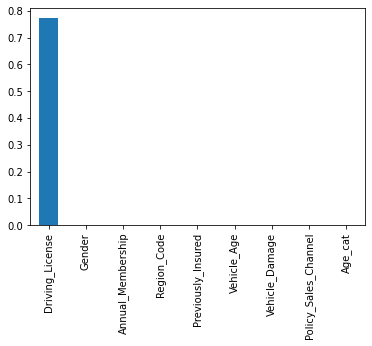

In [57]:
Cats = ["Gender","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Policy_Sales_Channel","Age_cat","Annual_Membership"]
df_cats = df[Cats]
df_cats = df_cats.astype(str)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cats['Gender'] = label_encoder.fit_transform(df_cats['Gender'])
df_cats['Region_Code'] = label_encoder.fit_transform(df_cats['Region_Code'])
df_cats['Vehicle_Age'] = label_encoder.fit_transform(df_cats['Vehicle_Age'])
df_cats['Vehicle_Damage'] = label_encoder.fit_transform(df_cats['Vehicle_Damage'])
df_cats['Annual_Membership'] = label_encoder.fit_transform(df_cats['Annual_Membership'])

from sklearn.feature_selection import chi2
X = df_cats
y = df['Response']

chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

## Anova

Metode Anova digunakan untuk memilih feature numerik sedangkan targetnya kategorik.

Feature 0: 0.575601
Feature 1: 0.740447
Feature 2: 3229.622469
Feature 3: 155.953111


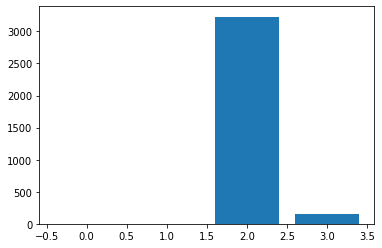

In [58]:
nums = ["Vintage_mon", "Vintage", "Age", "Annual_Premium"]
df_nums = df[nums]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X = df_nums
y = df["Response"]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

</br> Feature yang **akan digunakan** berdasarkan masing-masing metode:
</br>
</br> **Chi Square**
</br> - Gender
</br> - Annual_Membership
</br> - Region_Code
</br> - Previously_Insured
</br> - Vehicle_Age
</br> - Vehicle_Damage
</br> - Policy_Sales_Channel
</br> - Age_cat
</br> **Anova**
</br> - Age
</br> - Annual_Premium

Dengan demikian, maka feature yang tidak terpilih (Driving_License, Vintage, Vintage_mon dan juga id) akan di-drop dari dataset.


In [59]:
## Drop Feature
df_st2 = df.drop(["Driving_License", "Vintage_mon", "id"], axis = 1)
df_st2

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_cat,Annual_Membership
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,Gold
1,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0,4,Gold
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,Gold
3,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,Bronze
4,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,26.0,1,1-2 Year,No,30170.0,26.0,88,0,4,Bronze
381105,Male,30,37.0,1,< 1 Year,No,40016.0,152.0,131,0,1,Gold
381106,Male,21,30.0,1,< 1 Year,No,35118.0,160.0,161,0,1,Gold
381107,Female,68,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,4,Gold


# Train/Test Split Data

In [60]:
X = df_st2.drop(["Response"], axis = 1)
y = df_st2["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = df["Response"], random_state=123)

In [61]:
print("X_train size : ",X_train.size)
print("X_test size  : ",X_test.size)
print("y_train size : ",y_train.size)
print("y_test size  : ",y_test.size)

X_train size :  2934536
X_test size  :  1257663
y_train size :  266776
y_test size  :  114333


# Handling Missing Data & Duplicates

In [62]:
num = ["Age", "Annual_Premium"]
nom = ["Gender", "Region_Code", "Policy_Sales_Channel"]
ordi = ["Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]

X_train_num = X_train[num]
X_train_nom = X_train[nom]
X_train_ordi = X_train[ordi]

X_train_nom = X_train_nom.astype(str)
X_train_ordi = X_train_ordi.astype(str)

In [63]:
X_train.isna().sum()

Gender                  0
Age                     0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Age_cat                 0
Annual_Membership       0
dtype: int64

In [64]:
column1 = ["Gender","Age_cat", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Annual_Membership","Policy_Sales_Channel"]
column2 = num + nom + ordi
df[df.duplicated(subset= column1, keep = False)== True].sort_values(column1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_mon,Age_cat,Annual_Membership
229133,229134,Female,33,1,0.0,0,1-2 Year,No,2630.0,26.0,128,0,4.0,1,Silver
336182,336183,Female,33,1,0.0,0,1-2 Year,No,2630.0,26.0,71,0,2.0,1,Silver
2217,2218,Female,33,1,0.0,0,1-2 Year,No,2630.0,60.0,191,0,6.0,1,Silver
46962,46963,Female,31,1,0.0,0,1-2 Year,No,2630.0,60.0,148,0,5.0,1,Silver
88679,88680,Female,32,1,0.0,0,1-2 Year,No,2630.0,60.0,50,0,2.0,1,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297795,297796,Male,80,1,50.0,1,1-2 Year,No,37241.0,8.0,265,0,9.0,5,Gold
60887,60888,Male,80,1,50.0,1,1-2 Year,No,55368.0,8.0,36,0,1.0,5,Platinum
303703,303704,Male,80,1,50.0,1,1-2 Year,No,59432.0,8.0,128,0,4.0,5,Platinum
305355,305356,Male,80,1,50.0,1,1-2 Year,Yes,37792.0,26.0,205,0,7.0,5,Gold


In [65]:
df.duplicated().sum()

0

# Handling Outliers

Handling outlier dilakukan pada feature Annual_Premium dan Age yang belum di-binning. 

## Annual Premium

In [40]:
#berdasar IQR
Q1 =X_train['Annual_Premium'].quantile(0.25)
Q3 =X_train['Annual_Premium'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_1 = ((X_train['Annual_Premium'] >=low_limit)&(X_train['Annual_Premium']<=high_limit))
df_1=X_train[filtered_1]
df_1

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Age_cat,Annual_Membership
121993,Female,25,11.0,1,< 1 Year,No,25455.0,152.0,1,Bronze
230417,Female,41,3.0,0,1-2 Year,Yes,29302.0,154.0,2,Bronze
353590,Female,39,28.0,1,1-2 Year,No,22713.0,124.0,2,Bronze
363236,Female,27,11.0,1,< 1 Year,No,28847.0,152.0,1,Bronze
85749,Male,21,8.0,1,< 1 Year,No,56416.0,160.0,1,Platinum
...,...,...,...,...,...,...,...,...,...,...
238838,Male,47,3.0,0,1-2 Year,Yes,33905.0,124.0,2,Gold
306243,Female,42,28.0,0,1-2 Year,Yes,40918.0,122.0,2,Gold
266889,Female,24,15.0,0,< 1 Year,Yes,2630.0,152.0,1,Silver
230244,Male,23,46.0,1,< 1 Year,No,39842.0,152.0,1,Gold


<AxesSubplot:xlabel='Annual_Premium'>

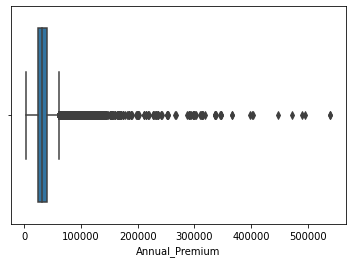

In [41]:
sns.boxplot(x=X_train['Annual_Premium'])

<AxesSubplot:xlabel='Annual_Premium'>

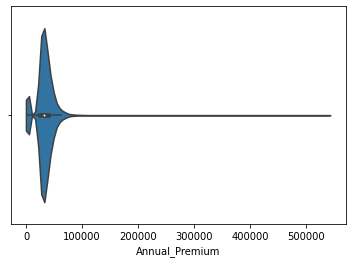

In [42]:
sns.violinplot(x=X_train['Annual_Premium'])

In [43]:
print ('batas atas Annual Premium=', high_limit)

batas atas Annual Premium= 61873.875


In [44]:
a=X_train[X_train['Annual_Premium']>=high_limit]
a.sort_values(by='Annual_Premium',ascending=False)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Age_cat,Annual_Membership
144282,Female,53,28.0,1,1-2 Year,No,540165.0,26.0,3,Platinum
54743,Male,26,28.0,0,< 1 Year,Yes,540165.0,156.0,1,Platinum
347413,Female,30,28.0,0,< 1 Year,Yes,495106.0,152.0,1,Platinum
172257,Male,40,28.0,0,1-2 Year,Yes,489663.0,122.0,2,Platinum
281679,Female,45,28.0,0,1-2 Year,Yes,472042.0,26.0,2,Platinum
...,...,...,...,...,...,...,...,...,...,...
176218,Male,24,8.0,0,< 1 Year,No,61878.0,152.0,1,Platinum
38997,Female,22,8.0,0,< 1 Year,No,61876.0,152.0,1,Platinum
176032,Female,25,28.0,1,< 1 Year,No,61876.0,152.0,1,Platinum
291669,Male,44,8.0,0,> 2 Years,Yes,61876.0,124.0,2,Platinum


In [45]:
print ('jumlah data awal pada data train=', len (X_train))
print ('jumlah outlier awal pada data train=', (len(X_train)-len(df_1)))
outlier_Annual_Premium= ((len(X_train)-len(df_1))/len(X_train))*100
print ('presentase outlier Annual Premium pada data train=', round(outlier_Annual_Premium,2),'%')

jumlah data awal pada data train= 266776
jumlah outlier awal pada data train= 7269
presentase outlier Annual Premium pada data train= 2.72 %


In [46]:
#preview data-data untuk Annual Premium pada X_test
X_test_highlimit=X_test[X_test['Annual_Premium']>=high_limit]
X_test_highlimit.sort_values(by='Annual_Premium',ascending=False)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Age_cat,Annual_Membership
268332,Male,46,28.0,0,1-2 Year,Yes,540165.0,124.0,2,Platinum
190154,Male,47,28.0,0,1-2 Year,Yes,540165.0,42.0,2,Platinum
11319,Female,50,46.0,1,1-2 Year,No,508073.0,26.0,3,Platinum
136304,Male,50,28.0,0,1-2 Year,Yes,472042.0,124.0,3,Platinum
275442,Male,22,28.0,0,1-2 Year,Yes,472042.0,163.0,1,Platinum
...,...,...,...,...,...,...,...,...,...,...
43505,Female,70,28.0,1,1-2 Year,No,61893.0,26.0,4,Platinum
249017,Female,25,28.0,1,< 1 Year,No,61893.0,152.0,1,Platinum
81886,Male,23,28.0,0,< 1 Year,Yes,61893.0,152.0,1,Platinum
147976,Male,25,46.0,1,< 1 Year,No,61892.0,152.0,1,Platinum


Tidak ada data yang didrop karena data tersebut masih tergolong collective outlier, serta tidak ada data outlier yang disubtitusi nilainya karena tidak ingin kehilangan informasi di rentang annual premium yang lebih tinggi.

# Class Imbalance

Handling Imbalance data akan dilakukan stage Model Machine Learning menggunakan class weight feature. 

[Penjelasan lebih lanjut terkait 'Class Weight Parameter'](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

# Feature Transform & Encoding

## Numeric Pipe

In [66]:
# var numeric
num_var = ['Age','Annual_Premium']

# preprocessing steps
scaler = StandardScaler(with_std=True) #digunakan standardisasi karena lebih robust terhadap outlier, sedangkan normalisasi lebih sensitif terhadap outlier
power = PowerTransformer(method='yeo-johnson') #works with positive and negative values

# numeric pipe
numeric_pipe = Pipeline([
    ('scaler', scaler),
    ('power', power)
]) 

## Categoric Pipe

In [68]:
# var categoric
cat_var = ['Gender','Vehicle_Damage','Previously_Insured']

# preprocessing steps 
oh_encoder = OneHotEncoder(handle_unknown='ignore',drop='first') #mencegah multicollinearity

# categoric pipe
cat_pipe = Pipeline([
    ('oh_encoder', oh_encoder)
]) 

## Binary Pipe

In [69]:
# var categoric
bin_var = ['Policy_Sales_Channel','Region_Code']

# preprocessing steps
bin_encoder = ce.BinaryEncoder(cols=['Policy_Sales_Channel','Region_Code'],return_df=(True))

# binary pipe
bin_pipe = Pipeline([
    ('bin_encoder',bin_encoder)
])

## Ordinal Pipe

In [70]:
# var categoric
ord_var_vage = ['Vehicle_Age']

# preprocessing steps
vehicle_age_levels = ['< 1 Year', '1-2 Year', '> 2 Years']
ord_encoder = OrdinalEncoder(categories=[vehicle_age_levels], dtype=int)

#ordinal pipe
ord_pipe = Pipeline([
    ('ord_encoder',ord_encoder)])

#var categoric
ord_var_age = ['Age_cat']
# preprocessing steps
age_levels = ['1','2', '3', '4', '5']
ord_encoder_1 = OrdinalEncoder(categories=[age_levels], dtype=int)

#ordinal pipe
ord_pipe_1 = Pipeline([
    ('ord_encoder_1',ord_encoder_1)])

#var categoric
ord_var_anp = ['Annual_Membership']
# preprocessing steps
anp_levels = ['Silver', 'Bronze', 'Gold', 'Platinum']
ord_encoder_2 = OrdinalEncoder(categories=[anp_levels], dtype=int)

# ordinal pipe
ord_pipe_2 = Pipeline([
    ('ord_encoder_2',ord_encoder_2)])

In [79]:
preprocessor = ColumnTransformer([
    ('numeric_pipe', numeric_pipe, num_var),
    ('categoric_pipe', cat_pipe, cat_var),
    ('bin_pipe',bin_pipe, bin_var),
    ('ord_pipe',ord_pipe, ord_var_vage),
    ('ord_pipe_1',ord_pipe_1, ord_var_age),
    ('ord_pipe_2',ord_pipe_2, ord_var_anp)
])

# Hasil Feature Encoding & Transformation 

In [82]:
X_train_result=pd.DataFrame(preprocessor.fit_transform(X_train))
X_train_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.946879,-0.261516,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.366362,-0.028939,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.236563,-0.430851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,-0.750448,-0.056116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.364742,1.463324,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,0.708598,0.240644,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
266772,0.427890,0.635720,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0
266773,-1.048260,-1.739779,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
266774,-1.151714,0.576127,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0


Keterangan:

Kolom 0: Age
</br>Kolom 1: Annual_Premium
</br>Kolom 2: Gender
</br>Kolom 3: Vehicle_Damage
</br>Kolom 4: Previously_Insured
</br>Kolom 5-12: Policy_Sales_Channel
</br>Kolom 13-18: Region_Code
</br>Kolom 19: Vehicle_Age
</br>Kolom 20: Age_cat
</br>Kolom 21: Anual_Membership

# Feature Tambahan

1.   **Jumlah kendaraan yang dimiliki**
</br>Semakin banyak kendaraan semakin banyak biaya operasional yang perlu dikeluarkan, sehingga kemungkinan akan mempengaruhi keputusan pelanggan untuk membeli asuransi kendaraan.

2.   **Kepemilikan utang/loan/credit score**
</br>Semakin banyak utang pelanggan kemungkinan akan mempengaruhi keputusannya untuk membeli asuransi kendaraan.

3.   **Jumlah anak**
</br>Semakin banyak anak semakin banyak biaya operasional yang perlu dikeluarkan, sehingga kemungkinan akan mempengaruhi keputusan membeli asuransi kendaraan. 

4.   **Tipe mobil** 
</br>Model mobil yang bergengsi /prestigious memiliki kemungkinan akan mempengaruhi keputusan pelanggan untuk membeli asuransi kendaraan. 

5.   **Pekerjaan**
</br>Pelanggan yang memiliki tipe pekerjaan yang mobile dengan kendaraan memiliki kemungkinan untuk membeli asuransi kendaraan.